# Carbon Polluters Exploration with Python
---

**<font color='red'>FYI internet access required for Section E.</font>**

---

**Which sample of Carbon Polluters are we examining?**    
US university facilities with large GHG emissions (> 25,000 metric tons of carbon dioxide equivalent (CO 2 e) per year) in any year between 2011 to 2021 (the latest reporting year). 

**What scientific approaches are we taking?**    
Statistical and geospatial approaches.

**What outputs will we develop?**    
Statistical graphs and interactive maps, with historical and/or regional dimensions.

**What will our outputs tell us?**    
Who and where are the significant US sources of carbon pollution within the Higher Education sector, at facility and state level, both recent and since 2011.  

**Beyond the well-known Eco impacts of Carbon Polluters, what makes this sample significant?**    
The fact that this sector has/individual universities are large fossil fuel burners may be a surprise seemingly out of sync with any green credentials or reputation they have garnered, especially relating to clean energy.
    
For further/corroborating findings, see recent Reuters article -> https://www.reuters.com/investigates/special-report/usa-pollution-universities/

---
**Data Source - University Emitters**
* Tutorial file: `CarbonPollutersExp_DATA.csv`
* Org: U.S. Environmental Protection Agency (EPA)
* Resource:  Facility Level Information on GreenHouse gases Tool (FLIGHT), which provides information about greenhouse gas (GHG) emissions from large facilities in the U.S., who are required to report annual data about their GHG emissions to EPA as part of the Greenhouse Gas Reporting Program (GHGRP) -> https://ghgdata.epa.gov/ghgp/main.do
* Related resources: All GHGRP data products -> https://www.epa.gov/ghgreporting/find-and-use-ghgrp-data

**Data Source - US state shapefile**
* Tutorial subfolder: `cb_2021_us_state_20m`
* Org: U.S. Census Bureau 
* Resource: Cartographic boundary files -> https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html
---

## A. Set-up Jupyter Notebook, University Emitters dataset & US state shapefile

>**A0.** Import the required packages and submodule with their conventional aliases.
>```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>**A1.** (OPTIONAL) For autocompletion, or if it's not working, try running this magic command.
>```
%config Completer.use_jedi = False
```

>**A2.** Set pandas display options to show all columns/not truncate their display.
>```
pd.options.display.max_columns = None
```

>**A3.** Read-in the university emitters dataset `"CarbonPollutersExp_DATA"`, and assign to `raw_data`.    
>
>**Code Detail:** Although we are still passing in just the path to the file as the only required parameter of the `read_csv()` method, note from the Docstring the range of options available for customising the call.
>```
raw_data = pd.read_csv("CarbonPollutersExp_DATA.csv")
```

In [2]:
raw_data = pd.read_csv("CarbonPollutersExp_DATA.csv")

>**A4.** Copy `raw_data` to create the `DataFrame` we will be prepping called `df_prep`.
>```
df_prep = raw_data.copy()
```

In [3]:
df_prep = raw_data.copy()


>**A5.** Ensure the US state shapefile `cb_2021_us_state_20m` is a subfolder in your current working directory (or locally accessible).  
> * This shapefile is an Esri vector data storage format that stores the official location, shape, and attributes for each state at the 1 : 20,000,000 (national) ratio scale. 
> * `cb_2021_us_state_20m` contains a set of related files, such as the `.shp`, `.shx`, `.dbf`, and `.prj` files components of the shapefile.
> * Download here -> https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip

---
## B. Inspect the University Emitters dataset

>**B0.** Have a look at the dataset of large carbon polluting US university facilities.
>
>**Code Detail:** Instead of `head()` returning a default number of rows (5), start specifying the `n` argument.
>```
df_prep.head(2)
```

<font color="green">***B0. Comments***    
*- Like the original Pangolin Trade data, there's missing data we need to handle.*    
*- However, unlike the Pangolin Trade data, the data requested from the EPA FLIGHT data source is the exact sample of interest, namely all facilities in the US universities sector with large emissions in any reporting year between 2011 and 2021. Every row is therefore relevant.*    
*- The required data prep (also called cleaning/munging/wrangling) is, therefore, needed to modify the columns, not the rows, which is the focus of the next section C.*

>**B1.** Find out the dimensions of `df_prep`.
>```
df_prep.shape
```

<font color="green">***B1. Comment***     
*- There are 118 US university facilities which were large carbon polluters in at least one of the years between 2011-2021.*

---
## C. Prepare the University Emitters dataset

>**C0.** Some of the columns are definitely not needed, so let's prepare to drop them, and with some efficiency. Instead of manually counting, let's programmatically find out the index positions of each `df_prep` column.
>```
list(enumerate(df_prep.columns))
```

>**C1.** Perform a drop operation that removes 4 particular columns from `df_prep` inplace (`SUBPARTS`, `CHANGE IN EMISSIONS (2020 TO 2021)`, `CHANGE IN EMISSIONS (2011 TO 2021)`, and `SECTORS`). Review the modification.    
>
>**Code Detail:** Pass the relevant subset of the `df_prep.columns` attribute as the named `columns` argument of the `drop()` method.    
>
>**Tech Note:** The `inplace` parameter is accepted by several pandas methods is used in this Tutorial where possible for brevity, but it's existence is controversial and currently in flux.
>```
df_prep.drop(columns = df_prep.columns[[10,22,23,24]], inplace=True)
df_prep.head(2)
```

In [4]:
df_prep.drop(columns = df_prep.columns[[10,22,23,24]], inplace=True)
df_prep.head(2)

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,"TOTAL REPORTED EMISSIONS, 2012","TOTAL REPORTED EMISSIONS, 2013","TOTAL REPORTED EMISSIONS, 2014","TOTAL REPORTED EMISSIONS, 2015","TOTAL REPORTED EMISSIONS, 2016","TOTAL REPORTED EMISSIONS, 2017","TOTAL REPORTED EMISSIONS, 2018","TOTAL REPORTED EMISSIONS, 2019","TOTAL REPORTED EMISSIONS, 2020","TOTAL REPORTED EMISSIONS, 2021"
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,"46,196","48,082","44,947","42,774","45,951","43,698","45,236","51,185","59,391","59,497"
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,"43,305","40,428","36,574","29,502","26,361","25,848","26,468","25,286",---,---


>**C2.** See what `dtype` pandas inferred was in each column when it originally read-in the `CarbonPollutersExp_DATA.csv`.
>```
df_prep.dtypes
```

<font color="green">***C2. Comment***     
*- pandas' inferences are only partial accurate. The columns that are essential to correct are the 11 years of reported emissions data. These are all currently `object` `dtype`, so basically string data, not numeric as required.*

>**C3.** Before we start modifying the 11 reported emissions data columns, let's shorten their long, cumbersome labels to just the reporting year reference. Review the modification.    
>
>**Code Detail:** Perform a renaming operation inplace where a `replace()` string method that returns a copy of the original string with the substring `"TOTAL REPORTED EMISSIONS, "` replaced by nothing is applied to each column label of `df_prep`.
>```
df_prep.rename(columns = lambda x: x.replace("TOTAL REPORTED EMISSIONS, ", ""), inplace=True)
df_prep.head(2)
```

In [5]:
df_prep.rename(columns = lambda x: x.replace("TOTAL REPORTED EMISSIONS, ", ""), inplace=True)
df_prep.head(2)

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,"46,196","48,082","44,947","42,774","45,951","43,698","45,236","51,185","59,391","59,497"
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,"43,305","40,428","36,574","29,502","26,361","25,848","26,468","25,286",---,---


>**C4.** Now start the process towards converting these 11 columns to a numeric `dtype`. Remove the comma characters from the string data in these 11 columns, but not anywhere else in `df_prep` (e.g. `"REPORTED ADDRESS"`). Review the modification.
> 
>**Code Detail:** Use pandas `loc` indexer to select these 11 `df_prep` columns by inputting a slice object with labels after the comma. `applymap()` applies a function to a Dataframe elementwise, as opposed to row/column-wise.    
>```
df_prep.loc[:, "2011":] = df_prep.loc[:, "2011":].applymap(lambda x: x.replace(",", ""))
df_prep.head(2)
```

In [6]:
df_prep.loc[:, "2011":] = df_prep.loc[:, "2011":].applymap(lambda x: x.replace(",", ""))
df_prep.head(2)

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,46196,48082,44947,42774,45951,43698,45236,51185,59391,59497
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,43305,40428,36574,29502,26361,25848,26468,25286,---,---


<font color="green">***C4. Comment***        
*- As a specific example of the general point that there are typically **multiple ways to do the same thing in scientific Python**, other ways we can select these 11 priority columns include:*
```
df_prep.iloc[:, -11:]
df_prep[df_prep.columns[-11:]]
df_prep.filter(regex="^20")
```

>**C5.** The last string clean-up step is to deal with the `"---"` instances in the 11 columns that we assume is EPA notation for `N/A`. We will replace these string values inplace with `NaN`. Review the modification.
>```
df_prep.replace("---", np.nan, inplace=True)
df_prep.head(2)
```

In [7]:
df_prep.replace("---", np.nan, inplace=True)
df_prep.head(2)

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,46196,48082,44947,42774,45951,43698,45236,51185,59391,59497
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,43305,40428,36574,29502,26361,25848,26468,25286,NaN,NaN


>**C6.** Now convert the 11 columns to a numeric `dtype` (note the `DeprecationWarning`). Review the modification by eye.  
>
>**Code Detail:** An alternative right-hand expression is `df_prep.loc[:, "2011":].astype(float)`
>```
df_prep.loc[:, "2011":] = df_prep.loc[:, "2011":].apply(pd.to_numeric)
df_prep.head(2)
```

In [8]:
df_prep.loc[:, "2011":] = df_prep.loc[:, "2011":].apply(pd.to_numeric)
df_prep.head(2)

/var/folders/d0/zf8g3jwx1r38bb54k6n7g8wr0000gn/T/ipykernel_13380/2632264094.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_prep.loc[:, "2011":] = df_prep.loc[:, "2011":].apply(pd.to_numeric)


,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,46196.0,48082.0,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,43305.0,40428.0,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN


>**C7.** Now review the modification more formally by accessing the `dtypes` attribute again.
>```
df_prep.dtypes
```

>**C8.** Now that the columns with the 11 years of reported emissions data are a numeric `dtype` (as well as some other columns), let's compute some quick summary statistics.    
>
>**Tech Note:** To show less/no decimal places use `pd.set_option ("display.precision", 0)`
>```
df_prep.describe()
```

>**C9.** The subset of 11 emissions columns is time series data. Generate a quick matplotlib line plot.
>
>**Code Detail:** Access the `T` attribute of the `df_prep` subset to return the transpose, then call the `plot()` method, using the `legend` keyword to not place a legend on the plot.  
>
>**Tech Note:** The `plot()` method for `DataFrame` or `Series` data structures uses the backend specified by the option `plotting.backend`, which has the default value of matplotlib.
>```
df_prep[ df_prep.columns[-11:]].T.plot(legend=False)
```

<AxesSubplot: >

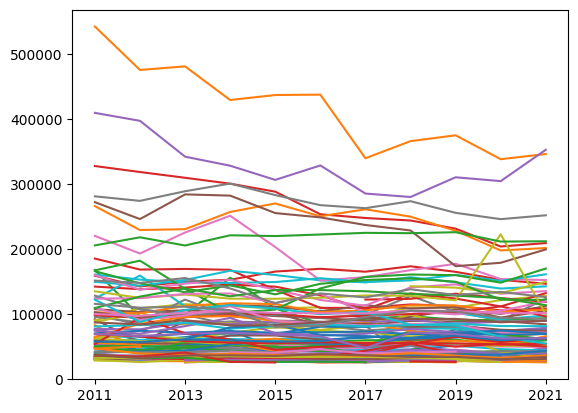

In [9]:
df_prep[ df_prep.columns[-11:]].T.plot(legend=False)

<font color="green">***C9. Comment***    
*- By eye it looks like all data points in the time series are above the 25,000 metric ton CO 2 e threshold as specified in the original EPA FLIGHT data request, but a programmatic check can optionally be performed in **C10.***

>**C10.** (OPTIONAL) Check that all the data points in the time series are either greater than 25,000 or `NaN` by generating a Boolean array for the conditions then determining whether all the values are `True` or not.
>```
( (df_prep.iloc[:, -11:] > 25000) | (df_prep.iloc[:, -11:].isna()) ).values.all()
```

>**C11.** Final task for **Section C.**, create a new `"Cumulative"` column with the sum of each facility's reported emissions data over the 11 years. Review the modification.
>
>**Code Detail:** Extend `df_prep` by assigning a new index value, `"Cumulative"` using the indexing operator. To perform the `sum()` operation on the columns axis a named `axis` argument of either `columns` or `1` must be passed.
>```
df_prep["Cumulative"] = df_prep.loc[:, "2011":].sum(axis=1)
df_prep.head(2)
```

In [10]:
df_prep["Cumulative"] = df_prep.loc[:, "2011":].sum(axis=1)
df_prep.head(2)

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Cumulative
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,48082.0,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0,528977.0
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,40428.0,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN,336405.0


>**C12.** (OPTIONAL) Calculate the total GHG emissions/volume of carbon pollution that the large facilities in the US university sector have been responsible for creating over the reported 11-year period.
>```
df_prep["Cumulative"].sum()
```

In [11]:
df_prep["Cumulative"].sum()

96212181.0

<font color="green">***C12. Comment***     
*- These 118 US university facilities are responsible for ~96 million tons of carbon pollution from 2011 to 2021.*

---
## D. Map dataset for regional trends - Basic

<font color="green">***D. Intro***       
*- For this mapping section D. and E. we use the geographic pandas extension, geopandas, to create a `GeoDataFrame` object.*       
*- A `GeoDataFrame` is a pandas `DataFrame` that has a column with geometry, and extends pandas functionality in order to make basic maps.*

>**D0.** Import geopandas with it's conventional alias.
>```
import geopandas as gpd
```

In [12]:
import geopandas as gpd

>**D1.** Create a `GeoDataFrame` called `geo_df` using `df_prep`. Review the new object.
> 
>**Code Detail:** Call geopandas `GeoDataFrame()` function, inputting `df_prep` as well as a `geometry` keyword argument which is another geopandas function `points_from_xy()` called with `df_prep`'s `"LONGITUDE"` and `"LATITUDE"` columns as the required positional `x` and `y` arguments respectively.    
>```
geo_df = gpd.GeoDataFrame(df_prep, geometry=gpd.points_from_xy(df_prep["LONGITUDE"], df_prep["LATITUDE"]))
geo_df.head()
```

In [13]:
geo_df = gpd.GeoDataFrame(df_prep, geometry=gpd.points_from_xy(df_prep["LONGITUDE"], df_prep["LATITUDE"]))
geo_df.head()

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2014,2015,2016,2017,2018,2019,2020,2021,Cumulative,geometry
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.935000,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0,528977.0,POINT (-111.93500 33.42195)
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.408930,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN,336405.0,POINT (-85.40893 40.19765)
2,BRIGHAM YOUNG UNIVERSITY,1002600,B-340 ASB,40.25243,-111.650270,PROVO,UTAH COUNTY,UT,84602,CORP OF THE PRESIDENT OF THE CHURCH OF JESUS C...,...,50164.0,52141.0,52845.0,38114.0,43291.0,77273.0,52209.0,79489.0,600383.0,POINT (-111.65027 40.25243)
3,BROWN UNIVERSITY MAIN CAMPUS,1001811,164 ANGELL STREET,41.99158,-71.510908,PROVIDENCE,PROVIDENCE COUNTY,RI,2912,BROWN UNIVERSITY IN PROVIDENCE IN THE STATE OF...,...,27352.0,28556.0,25458.0,25801.0,26872.0,26682.0,NaN,NaN,214961.0,POINT (-71.51091 41.99158)
4,Boston University,1002274,120 Ashford Street,42.35395,-71.122040,Boston,SUFFOLK COUNTY,MA,2134,TRUSTEES OF BOSTON UNIVERSITY (100%),...,49319.0,50937.0,51247.0,43986.0,50356.0,43827.0,37558.0,47622.0,517919.0,POINT (-71.12204 42.35395)


>**D2.** Generate a default plot of this new `GeoDataFrame` `geo_df`. Then try a customised plot where the colour of the points is based on their `"Cumulative"` column value. Finally try customising the colormap, `cmap`, used that reflect the `"Cumulative"` values.
> 
>**Tech Note:** geopandas uses matplotlib for this `plot()` method. matplotlib has a range of built-in colormaps -> https://matplotlib.org/stable/tutorials/colors/colormaps.html
>```
geo_df.plot()
geo_df.plot(column="Cumulative")
geo_df.plot(column="Cumulative", cmap="cool")
```

<AxesSubplot: >

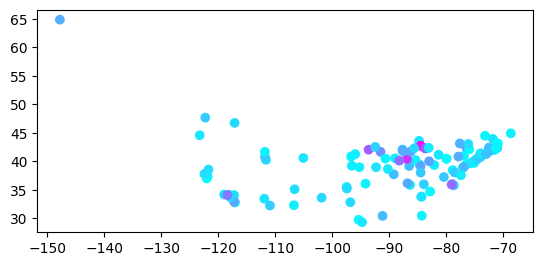

In [14]:
geo_df.plot(column="Cumulative", cmap="cool")

>**D3.** Evidently, `geo_df` plot needs a base map to contextualise the points. Load one of geopandas' available datasets, `"naturalearth_lowres"`, assign to `base_map`, then plot. 
>
>**Tech Note:** `base_map` is also a `GeoDataFrame` object.
>```
base_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 
base_map.plot()
```

<AxesSubplot: >

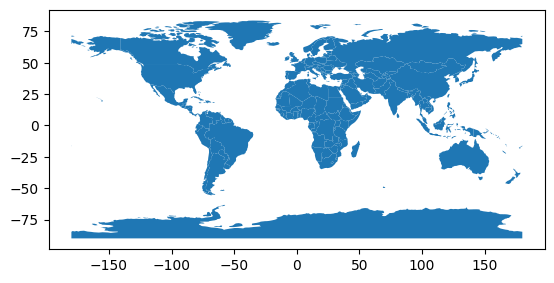

In [15]:
base_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 
base_map.plot()

>**D4.** (OPTIONAL): To get a better sense of what the geometry data represents and enables have a quick look at some rows of `base_map`, which is just another `GeoDataFrame`, and also try accessing the `"geometry"` value for the USA in the data to see how it is literally a drawing made up of multiple polygons (whilst other countries may be one polygon). Learn more about vector data -> https://datacarpentry.org/organization-geospatial/02-intro-vector-data/  
>
>**Tech Note:** To view more of the `"geometry"` column change the pandas column width setting: `pd.set_option("display.max_colwidth", None)`
>```
base_map.head()
base_map.at[4, "geometry"]
```

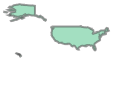

In [16]:
base_map.at[4, "geometry"]

>**D5.** (OPTIONAL) Find out the Coordinate Reference System (CRS) of the `base_map`.  
>
>**Tech Note:** From geopandas docs, "The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth." -> https://geopandas.org/en/stable/docs/user_guide/projections.html
>```
base_map.crs
```

>**D6.** Use matplotlib to construct a basic map that plots `geo_df` and `base_map` together, visualising the location of the 118 large university emitters and the relative size of their cumulative emissions over 2011-2021. 
>
>**Tech Note:** Many matplotlib plotting routines start with `fig, ax = plt.subplots()`, even when the output is a single plot, as a `Figure` and an `Axes` object is created in one step. `Axes` is not an `axis` reference, rather an instance of the class `plt.Axes` that is a bounding box object with ticks and labels. Conventionally, `ax` is used to refer to an individual axes instance, or a group of axes instances...!!
>```
fig, ax = plt.subplots(figsize=(12,8))    # Create an empty matplotlib Figure and Axes  
base_map.plot(ax=ax)
geo_df.plot(ax=ax, column="Cumulative", cmap="autumn_r")    # Other input options include legend=True, legend_kwds={"orientation": "horizontal"}
#plt.tight_layout()
#plt.savefig("<SomeFilename>.png", dpi=600)    # Save the Figure/Axes using matplotlib - use the optional dpi (dots-per-inch) argument to control the resolution of the png
plt.show()    # Display plot
```

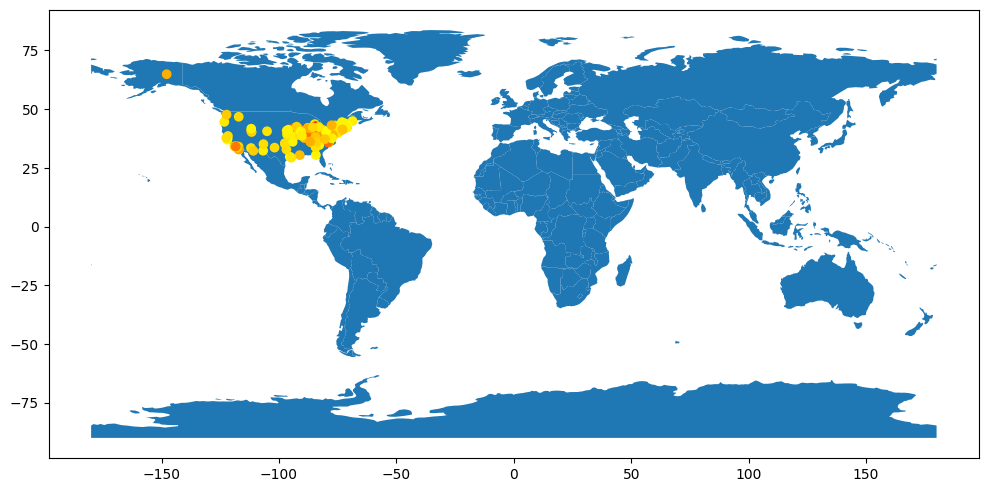

In [17]:
fig, ax = plt.subplots(figsize=(12,8))    # Create an empty matplotlib Figure and Axes  
base_map.plot(ax=ax)
geo_df.plot(ax=ax, column="Cumulative", cmap="autumn_r")    # Other input options include legend=True, legend_kwds={"orientation": "horizontal"}
#plt.tight_layout()
#plt.savefig("<SomeFilename>.png", dpi=600)    # Save the Figure/Axes using matplotlib - use the optional dpi (dots-per-inch) argument to control the resolution of the png
plt.show()    # Display plot

---
## E. Map dataset for regional trends - Interactive

<font color="green">***E. Intro***    
*- In this section we extend our geopandas extension of pandas with folium, an optional geopandas dependency which provides interactive mapping from the Open-Source leaflet.js library via a Python interface.*         
*- See geopandas docs -> https://geopandas.org/en/stable/gallery/plotting_with_folium.html*

>**E0.** Import folium.
>```
import folium
```

In [18]:
import folium

>**E1.** Test out the extended geopandas functionality that folium now enables. Call `explore()` on `base_map`.
>
>**Tech Node:** The leaflet/folium maps takes a moment to render.
>```
base_map.explore()
```

In [19]:
base_map.explore()

>**E2.** Rather than using a world map as a base layer to plot US-only data, let's prepare a regional map. Read-in the US Census states shapefile we double-checked in **Section A.**, creating another `GeoDataFrame`, and assign to `US_state_boundaries`.    
>
>**Tech Note:** Leave the `"cb_2018_us_state_20m"` directory and files as-is, they contain dependencies.
>```
US_state_boundaries = gpd.read_file("cb_2021_us_state_20m/cb_2021_us_state_20m.shp")
```

In [20]:
US_state_boundaries = gpd.read_file("cb_2021_us_state_20m/cb_2021_us_state_20m.shp")


>**E3.** (OPTIONAL) `US_state_boundaries` is another `GeoDataFrame` like `base_map` with multi/polygons, although for US states rather than world countries. What folium now allows us to do is visualize `GeoDataFrame` data on a leaflet map. Try calling `explore()` again.    
>```
US_state_boundaries.explore()
```

>**E4.** Through a plotting routine harnessing folium-extended capabilities of geopandas with `geo_df` and `US_state_boundaries`, construct an improved version of our **D6.** basic map, namely an interactive map that visualises the location of the 118 large university emitters and the relative size of their cumulative emissions over 2011-2021.
>
>**Code Details:** 
>* Create a `base_layer` which is an `US_state_boundaries.explore()` object, but setting several optional arguments that adjust formatting and interactivity.    
>* Then call `explore()` on `geo_df`, specifying this plot to be drawn on the existing map instance, `base_layer`, using the `m` keyword and `"Cumulative"` as the column to plot. Use available keyword arguments to fine-tune formatting and interactivity.
>* Finally, display `base_layer`.
>
>**Tech Notes:**
> * The `radius` of 4,828 meters set in `marker_kwds` is significant because this is the value used in EPA material on GHGRP facilities and their impact on surrounding communities, namely 3 miles -> https://edap.epa.gov/public/extensions/GHGRP-Demographic-Data-Highlights/GHGRP-Demographic-Data-Highlights.html
> * min_zoom refers to how far out (smaller int), max zoom refers to how far in (larger int)
>```
base_layer = US_state_boundaries.explore(location=[39, -97], width="60%", height="60%", zoom_start=4, min_zoom=3, tooltip=False, style_kwds=dict(fillOpacity=1, weight=1, fillColor="gainsboro"), highlight_kwds=dict(fillOpacity=0, weight=3))
>
>geo_df.explore(m=base_layer, column="Cumulative", marker_type="circle", marker_kwds=dict(radius=4828, fill=False), cmap="autumn_r", popup=["FACILITY", "Cumulative"], tooltip=False)
>
>#base_layer.save("<SomeFilename>.html")    # Save map, e.g. as html
base_layer
```

In [21]:
base_layer = US_state_boundaries.explore(location=[39, -97], width="60%", height="60%", zoom_start=4, min_zoom=3, tooltip=False, style_kwds=dict(fillOpacity=1, weight=1, fillColor="gainsboro"), highlight_kwds=dict(fillOpacity=0, weight=3))

geo_df.explore(m=base_layer, column="Cumulative", marker_type="circle", marker_kwds=dict(radius=4828, fill=False), cmap="autumn_r", popup=["FACILITY", "Cumulative"], tooltip=False)

#base_layer.save("<SomeFilename>.html")    # Save map, e.g. as html
base_layer

>**E5.** (OPTIONAL) Create folium heatmap plot to visualise the density of these facilities.
>
>**Code Detail:** The folium `HeatMap` needs a list of the points to plot in the form `[lat, long, weight (optional)]`. The `heatmap_points` list here is creating with list comprehension.
>```
from folium.plugins import HeatMap
>
>heatmap_points = [ [lat, long, weight] for lat, long, weight in zip(geo_df["LATITUDE"], geo_df["LONGITUDE"], geo_df["Cumulative"]) ]
>
>map_layer = folium.Map(location=[39, -97], tiles="cartodbpositron", width="60%", height="60%", zoom_start=4, min_zoom=3)
HeatMap(heatmap_points, radius=15, blur=5).add_to(map_layer)
#map_layer.save("<SomeFilename>.html")
>
>map_layer
```

In [22]:
from folium.plugins import HeatMap

heatmap_points = [ [lat, long, weight] for lat, long, weight in zip(geo_df["LATITUDE"], geo_df["LONGITUDE"], geo_df["Cumulative"]) ]

map_layer = folium.Map(location=[39, -97], tiles="cartodbpositron", width="60%", height="60%", zoom_start=4, min_zoom=3)
HeatMap(heatmap_points, radius=15, blur=5).add_to(map_layer)
#map_layer.save("<SomeFilename>.html")

map_layer

---
## F. Plot dataset for statistical trends

> **F0.** Copy `df_prep` and assign to `df_trends`, which we will prep for developing statistical graphs. Have a look at the new `DataFrame`.
>```
df_trends = df_prep.copy()
df_trends.head(2)
```

In [23]:
df_trends = df_prep.copy()
df_trends.head(2)

,FACILITY,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,ZIP CODE,PARENT COMPANIES,...,2014,2015,2016,2017,2018,2019,2020,2021,Cumulative,geometry
0,ARIZONA STATE UNIVERSITY,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,AZ,85281,ARIZONA STATE UNIVERSITY (100%),...,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0,528977.0,POINT (-111.93500 33.42195)
1,BALL STATE UNIVERSITY,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,IN,47306,STATE OF INDIANA (100%),...,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN,336405.0,POINT (-85.40893 40.19765)


> **F1.** Delete the unnecessary `"geometry"` column.
>```
del df_trends["geometry"]
```

In [24]:
del df_trends["geometry"]

>**F2.** The statistical graphs we're developing plot each facility separately, and also separately within State subsets. It's now useful for the row labels to be meaningful, rather than the integer index created by default by the original pandas `read_csv()` call. Set the index of `df_trends` using the existing columns `"FACILITY"` and `"STATE"`, making the change inplace. Review the modification.
>
>**Tech Note:** `df_trends` now has a `MultiIndex`.
>```
df_trends.set_index(["FACILITY", "STATE"], inplace=True)
df_trends.head(2)
```

In [25]:
df_trends.set_index(["FACILITY", "STATE"], inplace=True)
df_trends.head(2)

,,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY,COUNTY,ZIP CODE,PARENT COMPANIES,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Cumulative
FACILITY,STATE,,,,,,,,,,,,,,,,,,,,
ARIZONA STATE UNIVERSITY,AZ,1006199,"300 E. University Drive, Suite 320",33.42195,-111.93500,TEMPE,MARICOPA COUNTY,85281,ARIZONA STATE UNIVERSITY (100%),42020.0,46196.0,48082.0,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0,528977.0
BALL STATE UNIVERSITY,IN,1004171,2000 W UNIVERSITY AVE,40.19765,-85.40893,MUNCIE,DELAWARE COUNTY,47306,STATE OF INDIANA (100%),82633.0,43305.0,40428.0,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN,336405.0


>**F3.** The statistical graphs we're developing only need the columns with stats data (now that the essential non-stats data is now the row label). Drop the slice of columns from `"GHGRP ID"` to `"PARENT COMPANIES"` inplace. Review the modification.
>```
df_trends.drop(df_trends.loc[:, "GHGRP ID":"PARENT COMPANIES"], axis=1, inplace=True)
df_trends.head(2)
```

In [26]:
df_trends.drop(df_trends.loc[:, "GHGRP ID":"PARENT COMPANIES"], axis=1, inplace=True)
df_trends.head(2)

,,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Cumulative
FACILITY,STATE,,,,,,,,,,,,
ARIZONA STATE UNIVERSITY,AZ,42020.0,46196.0,48082.0,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0,528977.0
BALL STATE UNIVERSITY,IN,82633.0,43305.0,40428.0,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN,336405.0


>**F4.** Generate one of the target statistical graphs, namely a horizontal stacked bar chart of each facility's reported year emissions, ordering the facilities by their `"Cumulative"` value.
>
>**Code Detail:** Accept `sort_values()` default behaviour to sort ascending, as the horizontal bar chart plots from the origin of the y-axis up, so the facilities with the largest `"Cumulative"` values will be top, as desired.
>
>**Tech Note:** The computation takes a moment!
>```
df_trends.sort_values("Cumulative").loc[:, "2011":"2021"].plot(kind="barh", stacked=True, figsize=(20,15), legend=False, fontsize=8)   # To save the plot and with 600 dpi, chain the following: .get_figure().savefig("<SomeFilename>.png", dpi=600)
```

<AxesSubplot: ylabel='FACILITY,STATE'>

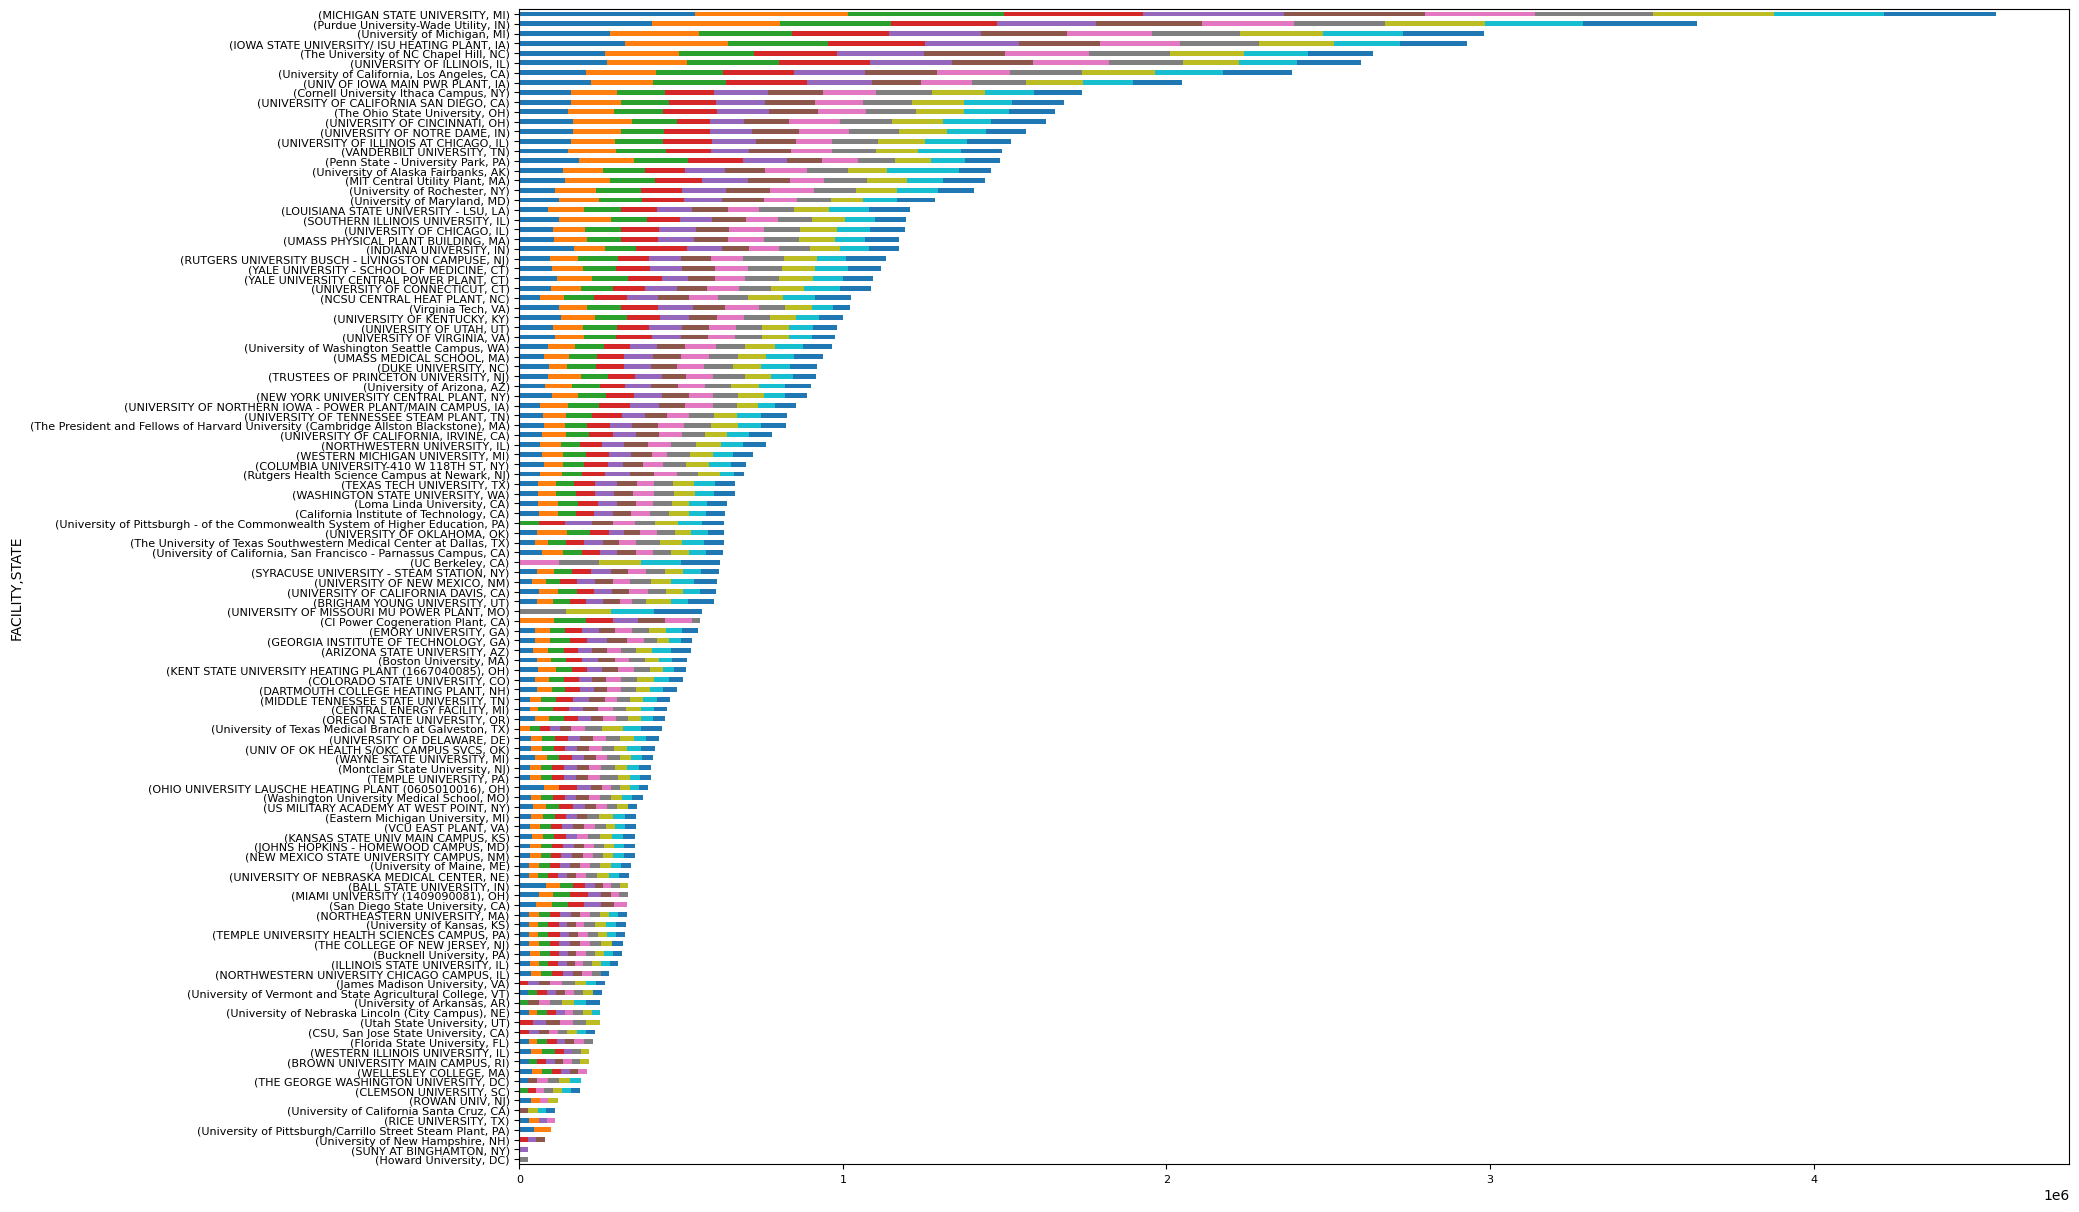

In [27]:
df_trends.sort_values("Cumulative").loc[:, "2011":"2021"].plot(kind="barh", stacked=True, figsize=(20,15), legend=False, fontsize=8)   # To save the plot and with 600 dpi, chain the following: .get_figure().savefig("<SomeFilename>.png", dpi=600)

>**F5.** Prepare for generating the final statistical graph, visualising the time series of each facility but in subplots by state, and only for the 12 states with the worst aggregate cumulative emissions. Compute the state-level aggregate cumulative emissions.
>```
df_trends.groupby("STATE")["Cumulative"].sum()
```

In [28]:
df_trends.groupby("STATE")["Cumulative"].sum()

STATE
AK    1458358.0
AR     249679.0
AZ    1431446.0
CA    9223664.0
CO     504670.0
CT    3297846.0
DC     216636.0
DE     430491.0
FL     226549.0
GA    1084155.0
IA    5834502.0
IL    8065024.0
IN    6715174.0
KS     685737.0
KY    1000887.0
LA    1207088.0
MA    5434380.0
MD    1641817.0
ME     343786.0
MI    9498168.0
MO     945021.0
NC    4583630.0
NE     589164.0
NH     565650.0
NJ    3596028.0
NM     967969.0
NY    5739239.0
OH    4531762.0
OK    1051753.0
OR     448785.0
PA    3267094.0
RI     214961.0
SC     186195.0
TN    2783030.0
TX    1847768.0
UT    1830575.0
VA    2626152.0
VT     254565.0
WA    1632783.0
Name: Cumulative, dtype: float64

>**F6.** Re-use the code from **F5.** but this time sort the default alphabetical output from worst to best, access just the first 12 indices. Assign this expression to `worst12states` and review.
```
worst12states = df_trends.groupby(["STATE"])["Cumulative"].sum().sort_values(ascending=False).index[:12]
worst12states
```

In [29]:
worst12states = df_trends.groupby(["STATE"])["Cumulative"].sum().sort_values(ascending=False).index[:12]
worst12states

Index(['MI', 'CA', 'IL', 'IN', 'IA', 'NY', 'MA', 'NC', 'OH', 'NJ', 'CT', 'PA'], dtype='object', name='STATE')

>**F7.** Assign a copy of `df_trends` without the `"Cumulative"` column to a variable `df_timeseries`, and review.
>```
df_timeseries = df_trends.drop(columns = "Cumulative").copy()
df_timeseries.head(2)
```

In [30]:
df_timeseries = df_trends.drop(columns = "Cumulative").copy()
df_timeseries.head(2)

,,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
FACILITY,STATE,,,,,,,,,,,
ARIZONA STATE UNIVERSITY,AZ,42020.0,46196.0,48082.0,44947.0,42774.0,45951.0,43698.0,45236.0,51185.0,59391.0,59497.0
BALL STATE UNIVERSITY,IN,82633.0,43305.0,40428.0,36574.0,29502.0,26361.0,25848.0,26468.0,25286.0,NaN,NaN


>**F8.** Test how to select a cross-section of `df_timeseries` using the `"MultiIndex"` we set in **F2.**, specifically returning all the facilities in the state of Pennsylvania (`"PA"`). Then transpose the test `DataFrame`, as the format convenient for plotting time series line graphs.
>```
df_timeseries.xs("PA", level="STATE").T
```

In [31]:
df_timeseries.xs("PA", level="STATE").T

FACILITY,Bucknell University,Penn State - University Park,TEMPLE UNIVERSITY,TEMPLE UNIVERSITY HEALTH SCIENCES CAMPUS,University of Pittsburgh - of the Commonwealth System of Higher Education,University of Pittsburgh/Carrillo Street Steam Plant
2011,32042.0,184969.0,33995.0,29925.0,NaN,46498.0
2012,31678.0,168078.0,32650.0,28491.0,NaN,50053.0
2013,30616.0,169030.0,33901.0,30574.0,60819.0,NaN
2014,28607.0,167739.0,37545.0,35368.0,79072.0,NaN
2015,26487.0,136984.0,38004.0,27673.0,83466.0,NaN
2016,27016.0,109137.0,36048.0,29952.0,67411.0,NaN
2017,27864.0,109250.0,37242.0,30056.0,65537.0,NaN
2018,29836.0,114504.0,54088.0,30154.0,62925.0,NaN
2019,27977.0,112120.0,38397.0,27449.0,70488.0,NaN
2020,26196.0,105317.0,31736.0,28068.0,74398.0,NaN


<font color="green">***F9. Prep** (OPTIONAL)*   
*- The final statistical graph consists of 12 subplots. They are arranged over 4 rows and 3 columns.*        
*- We will therefore be setting up 12 axes instances in this plotting routine, not just 1 as in D6.*    
*- Note that the `axes` variable is the equivalent of specifying the 12 axes instances as a 2D numpy array of size 4x3:*
```
fig, [[ax0, ax1, ax2], [ax3, ax4, ax5], [ax6, ax7, ax8], [ax9, ax10, ax11]] = plt.subplots(nrows=4, ncols=3)
```   
<font color="green">or conceptually:
```
array([["ax0", "ax1", "ax2"],
       ["ax3", "ax4", "ax5"],
       ["ax6", "ax7", "ax8"],
       ["ax9", "ax10", "ax11"]])
```
<font color="green">When we `flatten()` `axes` (to `zip` it for the `for` loop) this collapses the array into 1 dimension, i.e.:
```
np.array([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11])
```

>**F9.** Make the final statistical graph. Use matplotlib to set-up and generate state-level time series subplots showing the 2011-2021 emissions for each facility in the 12 states with the worst aggregate cumulative emissions.
> 
>**Code Detail:** The central operation is the `for` loop that gets the state-specific `df_timeseries` cross-section, transposes and plots on the designated plotting area (axes). Note the many keyword argument used and available to fine-tune the plot aesthetics and readability.
>
>**Tech Note:** The computation will again take a moment!
>```
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20), sharey=True)
for state, ax in zip(worst12states, axes.flatten()):
    df_timeseries.xs(state, level="STATE").T.plot(ax=ax)
    ax.set_title(state)
    ax.legend(loc="best", fontsize="medium", labelspacing=0.25)
>
>plt.setp(axes, xlabel="Reporting Year", ylabel="CO2e metric tons per Reporting Year", xticks=range(len(df_timeseries.columns)), xticklabels= df_timeseries.columns,    # range(2011, 2022) range(0,11)
         yticks=range(0,550001,25000))
#plt.tight_layout()
#plt.savefig("<SomeFilename>.png", dpi=600)
plt.show()
```

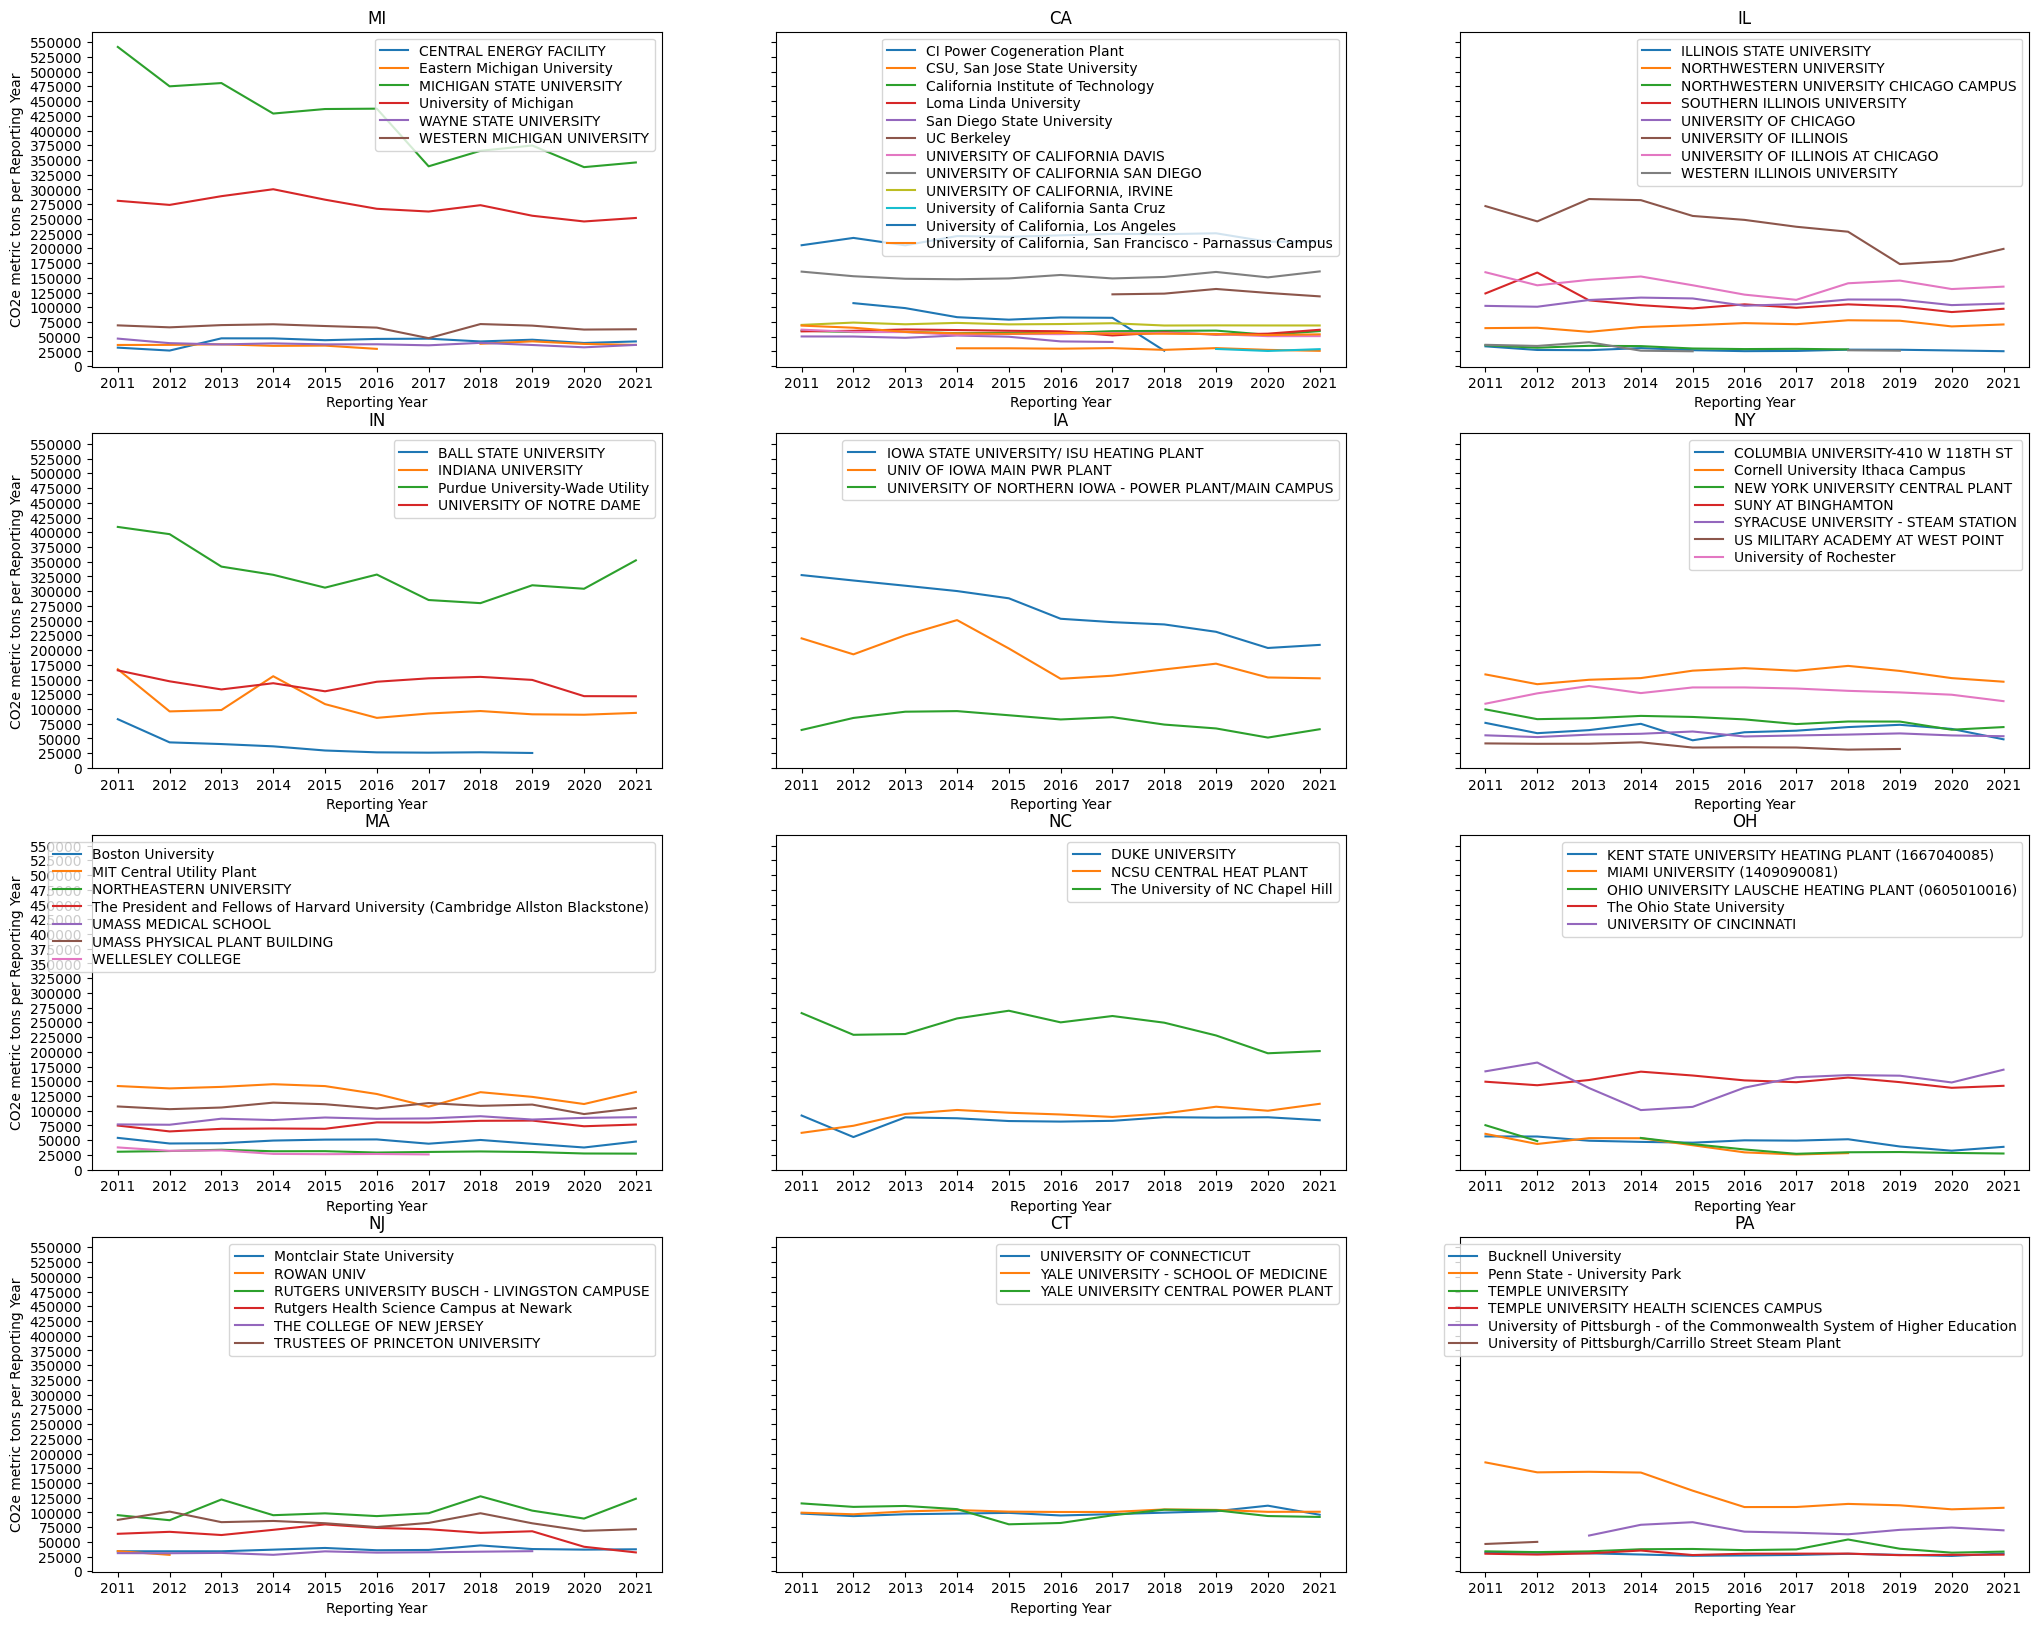

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20), sharey=True)
for state, ax in zip(worst12states, axes.flatten()):
    df_timeseries.xs(state, level="STATE").T.plot(ax=ax)
    ax.set_title(state)
    ax.legend(loc="best", fontsize="medium", labelspacing=0.25)

plt.setp(axes, xlabel="Reporting Year", ylabel="CO2e metric tons per Reporting Year", xticks=range(len(df_timeseries.columns)), xticklabels= df_timeseries.columns,    # range(2011, 2022) range(0,11)
         yticks=range(0,550001,25000))
#plt.tight_layout()
#plt.savefig("<SomeFilename>.png", dpi=600)
plt.show()

<font color="green">***F9. Comment***        
*- Different approaches to Carbon Reporting and accountability could reveal different insights. Instead of the EPA's GHGRP requiring individual facilities exceeding the 25,000 CO 2 e metric tons threshold to report their pollution, there may be more interesting trends if this requirements was at Parent-level.*      
*- Whilst we know all the individual large facilities with the same parent university (e.g. Yale's 2 large facilities, School of Medicine and Central Power Plant), we don't know if the sum of these large facilities equates to the full picture of the parent university's carbon pollution (e.g. as there is no visibility of any smaller facilities of Yale's which are not required to report.* 